# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [1]:
# Resolver acá
import requests

#se busca mediante la api cualquier atributo que tenga como valor "fifa 2025"
buscar = "fifa 2025"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))


resultados = requests.request("GET", url)
resultados=resultados.json()
print(resultados)

{'site_id': 'MLA', 'country_default_time_zone': 'GMT-03:00', 'query': 'fifa 2025', 'paging': {'total': 124, 'primary_results': 2, 'offset': 0, 'limit': 50}, 'results': [{'id': 'MLA1852361470', 'title': 'Juego Playstation 5 Ea Sports Fc 25 Ps5 (fifa) / Makkax', 'condition': 'new', 'thumbnail_id': '830362-MLA77655645664_072024', 'catalog_product_id': None, 'listing_type_id': 'gold_special', 'sanitized_title': 'juego-playstation-5-ea-sports-fc-25-ps5-fifa-makkax', 'permalink': 'https://articulo.mercadolibre.com.ar/MLA-1852361470-juego-playstation-5-ea-sports-fc-25-ps5-fifa-makkax-_JM', 'buying_mode': 'buy_it_now', 'site_id': 'MLA', 'category_id': 'MLA373840', 'domain_id': 'MLA-VIDEO_GAMES', 'thumbnail': 'http://http2.mlstatic.com/D_830362-MLA77655645664_072024-I.jpg', 'currency_id': 'ARS', 'order_backend': 1, 'price': 169999, 'original_price': None, 'sale_price': {'price_id': '', 'amount': 169999, 'conditions': {'eligible': True, 'context_restrictions': ['channel_marketplace'], 'start_tim

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [2]:
# Resolver acá
import pandas as pd
from pandas import DataFrame
#se guarda en un dataframe los datos de los resultados
pdprecios=DataFrame(resultados['results'])
#se imprime el precio de todos los resultados y además se calcula el promedio, maximo y minimo con las funciones mean(),max() y min() respectivamente
print(pdprecios['price'])
print('el promedio es: '+str(pdprecios['price'].mean()))
print('el maximo es: '+str(pdprecios['price'].max()))
print('el minimo es: '+str(pdprecios['price'].min()))

0     169999.00
1     203999.00
2      44999.70
3     129999.00
4      70490.00
5     139999.00
6      21999.00
7       3095.69
8      58000.00
9       3095.69
10      2399.00
11      5699.00
12      3851.42
13      2699.00
14     28405.00
15     80999.46
16      4891.35
17     28006.95
18     84999.00
19      2499.00
20      8252.88
21      3401.47
22      2499.00
23     49999.00
24     19990.00
25      2499.00
26     50000.00
27     33000.00
28     50000.00
29      3000.00
30     40201.15
31     15000.00
32     19990.00
33     21755.00
34     19000.00
35      2499.00
36     81499.00
37      9500.00
38     79999.99
39     74999.99
40     64332.00
41     59000.00
42    129999.00
43     69900.00
44     59887.00
45     12500.00
46     31350.00
47     89107.00
48     35396.60
49     72226.25
Name: price, dtype: float64
el promedio es: 46018.171800000004
el maximo es: 203999.0
el minimo es: 2399.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

<Axes: >

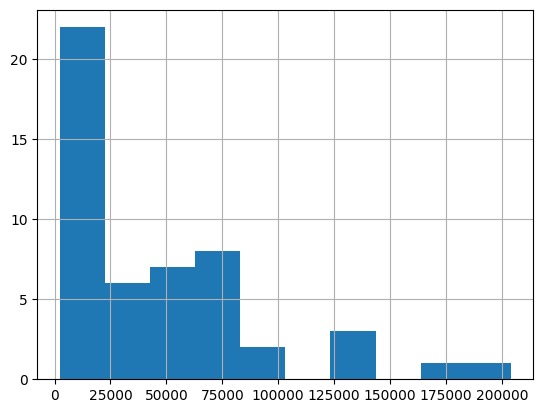

In [3]:
# Resolver acá
#se importa matplotlib para que se pueda la funcion hist() en el código
import matplotlib
pdprecios['price'].hist()
#hay varios outliars que exceden los 100.000 pesos

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [14]:
# Resolver acá
import requests
import pandas as pd

#Busco mi golcito
buscar = "gol trend 2018"

url = f"https://api.mercadolibre.com/sites/MLA/search?q={buscar}"

response = requests.get(url)
resultados = response.json()

#Hago listas para almacenar la info que quiero ver
titulos = []
precios = []
condiciones = []

#Defino condiciones de los ítems obtenidos y obtener el título, precio y condición
for item in resultados['results']:
    titulos.append(item['title'])
    precios.append(item['price'])

    if 'condition' in item:
        condiciones.append(item['condition'])  # Condición del auto (nuevo o usado)
    else:
        condiciones.append('Condición no disponible')

#Convierto los precios a terminos numericos con float
precios = [float(precio) for precio in precios]

#Hago un DataFrame con los datos obtenidos
df = pd.DataFrame({
    'Titulo': titulos,
    'Precio': precios,
    'Condición': condiciones,
})

#Filtro los menores a 50000 para obtener aquellos que son en USD
df_filtrado = df[df['Precio'] < 50000]

#Hago un head para tener los primeros 20 resultados
print("Resultados de la búsqueda 'Gol Trend 2018'\n")
print(df_filtrado.head(20)) 

#Precio promedio, mínimo y máximo de los autos filtrados
precio_promedio = df_filtrado['Precio'].mean()
precio_minimo = df_filtrado['Precio'].min()
precio_maximo = df_filtrado['Precio'].max()

#Análisis de precios filtrados
print(f"\nPrecio promedio: ${precio_promedio:.2f}")
print(f"Precio mínimo: ${precio_minimo:.2f}")
print(f"Precio máximo: ${precio_maximo:.2f}")

Resultados de la búsqueda 'Gol Trend 2018'

                                               Titulo   Precio Condición
1              Volkswagen Gol Trend Comfortline 2018   11500.0      used
2        Volkswagen Gol 1.6 5p Trend Comfort L17 2018  10000.0      used
4            Volkswagen Gol Trend 1.6 Trendline 101cv  10000.0      used
5                           Volkswagen Gol Trend 2018  12000.0      used
6   Volkswagen Gol Trend 1.6 Msi - Primera Mano! 8...  10800.0      used
7     Volkswagen Gol Trend 2018 1.6 Comfortline 101cv   8300.0      used
9            Volkswagen Gol Trend 1.6 Sportline 101cv  12800.0      used
10                              Volkswagen Gol Trend    9500.0      used
12      Volkswagen Gol Trend 2018 1.6 Trendline 101cv  10500.0      used
13      Volkswagen Gol Trend 2018 1.6 Trendline 101cv  10500.0      used
15         Volkswagen Gol Trend Highline 1.6 Msi 2018  11900.0      used
17                          Volkswagen Gol Trend 2018   9900.0      used
19     

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la portada de La Nación
url = "https://www.lanacion.com.ar/"

#consigo todos los articulos de la pagina
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
articulos=soup.find_all("article", class_="ln-card")
links=[]
#corro los articulos y busco los links, que esta en el valor "a", 
for articulo in articulos:
    link = articulo.find("a", href=True)["href"]
    #por alguna razón los links no tienen el http por lo que se lo agrega
    if not link.startswith("http"):
            link = url + link
    #lo uno todo a una matriz
    links.append(link)
# agrego los resultados del for loop a un pandas
pdlinks=pd.DataFrame({
        "Link": links
    })
#lo mando todo a un excel
pdlinks.to_excel('links_articulos.xlsx', index=False,engine='openpyxl')